<a href="https://colab.research.google.com/github/gomes-lab/course-cs2770-2024sp/blob/main/colab-notebooks/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This cell import the necessary packages for running the code
import numpy as np
import PIL
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import urllib
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score
plt.rcParams.update({'font.size': 14})

In [2]:
# -------------------------------------------------------------
# Load Data
#
# training_data - subset of the data used to train, or fit
# the the predictive models
# test_data - subset of the data used to indepently
# assess the model
# map_data - this data set includes all of the predictors
# evaluated across a regular grid of locations
# that covers the study area.
# -------------------------------------------------------------
url_train='https://raw.githubusercontent.com/gomes-lab/course-cs2770-2024sp/main/data/L21_Wood_Thrush_train.data.CSV'
url_test= 'https://raw.githubusercontent.com/gomes-lab/course-cs2770-2024sp/main/data/L21_Wood_Thrush_test.data.CSV'
url_map='https://raw.githubusercontent.com/gomes-lab/course-cs2770-2024sp/main/data/L21_Wood_Thrush_map.data.CSV'
train_data= pd.read_csv(url_train)
test_data=pd.read_csv(url_test)
map_data=pd.read_csv(url_map)

# -------------------------------------------------------------
# Look at the data structure
# -------------------------------------------------------------
train_data.head() #print out the first few lines of the csv file

,I.STATIONARY,YEAR,DAY,TIME,EFFORT_HRS,EFFORT_DISTANCE_KM,NUMBER_OBSERVERS,ELEVATION,Water,Evergreen_Needleleaf,...,Open_shrublands,Woody_savannas,Savannas,Grasslands,Croplands,Urban,Barren,LONGITUDE,LATITUDE,y
0,1,2013,195,20.00,0.167,0.000,1,249,0.0,0.0,...,0.0,0.0000,0.0000,5.5556,11.1111,63.8889,0,-76.482475,42.447497,0
1,0,2013,201,9.73,0.833,1.996,1,318,0.0,0.0,...,0.0,0.0000,0.0000,8.3333,50.0000,0.0000,0,-76.462876,42.481421,0
2,1,2013,187,6.05,0.083,0.000,1,310,0.0,0.0,...,0.0,2.7778,0.0000,8.3333,41.6667,0.0000,0,-76.463070,42.478690,0
3,0,2013,169,15.42,2.933,5.150,1,275,0.0,0.0,...,0.0,2.7778,0.0000,0.0000,0.0000,2.7778,0,-76.463390,42.407110,1
4,0,2013,177,7.17,0.567,1.770,1,366,0.0,0.0,...,0.0,2.7778,5.5556,0.0000,27.7778,0.0000,0,-76.390214,42.691647,1


In [3]:
# -------------------------------------------------------------
# Mean Reporting Rate
# -------------------------------------------------------------
print('Mean reporting rate is',train_data.y.mean())

# Means + quantiles for all columns
train_data.describe()

Mean reporting rate is 0.28501228501228504


,I.STATIONARY,YEAR,DAY,TIME,EFFORT_HRS,EFFORT_DISTANCE_KM,NUMBER_OBSERVERS,ELEVATION,Water,Evergreen_Needleleaf,...,Open_shrublands,Woody_savannas,Savannas,Grasslands,Croplands,Urban,Barren,LONGITUDE,LATITUDE,y
count,407.000000,407.0,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.0,407.000000,407.000000,407.000000
mean,0.491400,2013.0,182.004914,10.473366,0.581477,0.642015,1.555283,331.601966,2.633659,0.372283,...,0.081901,1.136296,0.334428,3.240118,27.441213,2.260415,0.0,-76.437957,42.451127,0.285012
std,0.500541,0.0,10.883167,4.295398,0.686243,1.188930,1.903139,88.119119,10.743567,1.611082,...,0.579113,1.798517,1.413317,3.170151,18.378729,9.842912,0.0,0.072304,0.075421,0.451976
min,0.000000,2013.0,165.000000,5.000000,0.017000,0.000000,1.000000,113.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-76.728889,42.267762,0.000000
25%,0.000000,2013.0,173.000000,7.270000,0.083000,0.000000,1.000000,309.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.333300,0.000000,0.0,-76.463187,42.432257,0.000000
50%,0.000000,2013.0,181.000000,8.450000,0.200000,0.020000,1.000000,325.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.777800,36.111100,0.000000,0.0,-76.452913,42.474070,0.000000
75%,1.000000,2013.0,191.500000,13.150000,0.967000,0.966000,2.000000,340.000000,0.000000,0.000000,...,0.000000,2.777800,0.000000,5.555600,41.666700,0.000000,0.0,-76.426915,42.479549,1.000000
max,1.000000,2013.0,201.000000,20.000000,3.000000,8.047000,30.000000,547.000000,56.521700,12.195100,...,5.555600,8.333300,11.111100,18.918900,91.666700,83.333300,0.0,-76.220320,42.691650,1.000000


(-76.728889, -76.22032, 42.267762, 42.69165)


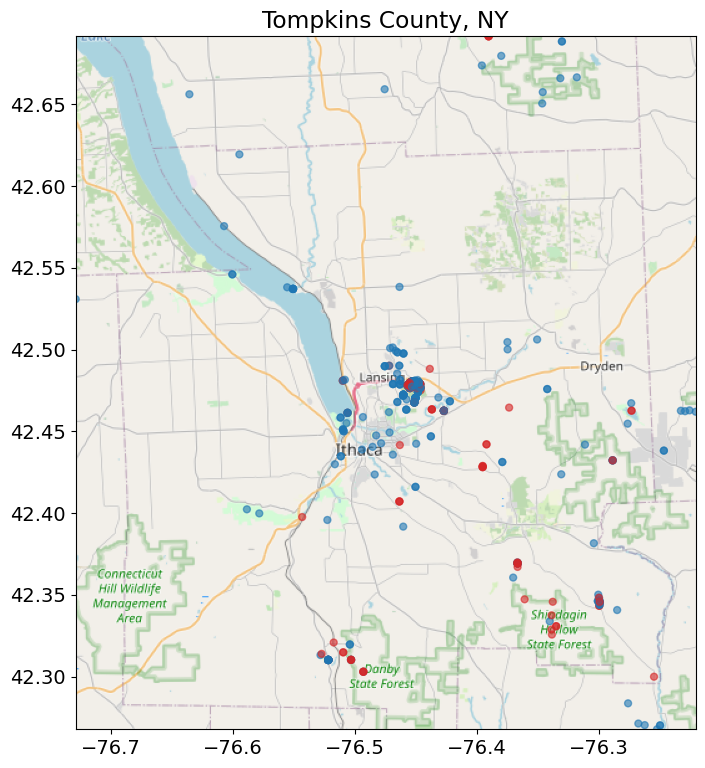

In [4]:
# -----------------------------------------
# Plot Map of Observation Locations
# -----------------------------------------
#First find the boundaries of the map
BBox = ((train_data.LONGITUDE.min(),   train_data.LONGITUDE.max(),
         train_data.LATITUDE.min(), train_data.LATITUDE.max()))
print(BBox)
#We exported a map within the bounding box from OpenStreetMap
#Load the map
url = 'https://github.com/gomes-lab/course-cs2770-2024sp/blob/main/data/map_of_ithaca_small.png?raw=true'
ithaca_map = np.array(PIL.Image.open(urllib.request.urlopen(url)))
#set the colors of the dots
set_color=lambda x : '#d62728' if (x==1) else '#1f77b4'
color=[set_color(x) for x in train_data.y]
fig, ax = plt.subplots(figsize = (8,9))
plt.rcParams.update({'font.size': 14})
#plot the map under the scatter points
ax.imshow(ithaca_map,extent = BBox,aspect='auto')
ax.scatter(train_data.LONGITUDE, train_data.LATITUDE, c=color, alpha=0.6, s=25)
ax.set_title('Tompkins County, NY')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.show()

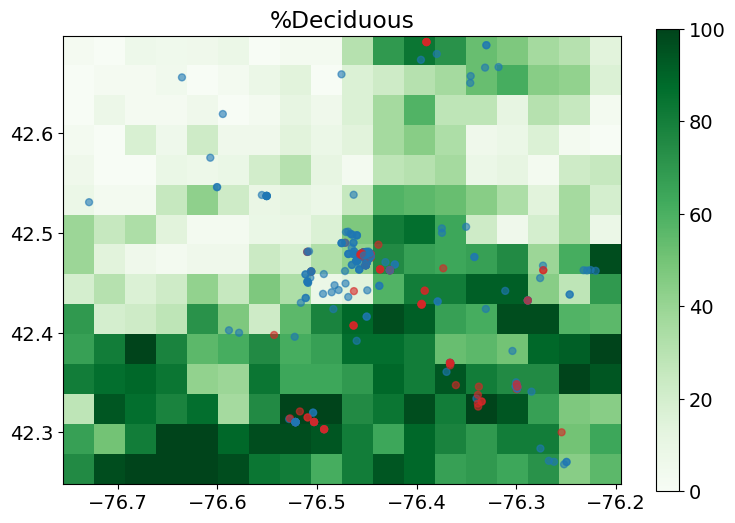

In [5]:
# -----------------------------------------
# Plot Map
# Wood Thrush Reports With Deciduous Forest Cover
# -----------------------------------------
#create an array of the percentage of Deciduous
nrow=15
ncol=18
forest_array=np.zeros((nrow,ncol))
#compute the boundaries of the map
grid_size_h=(map_data.LONGITUDE.max()-map_data.LONGITUDE.min())/(ncol-1)
grid_size_v=(map_data.LATITUDE.max()-map_data.LATITUDE.min())/(nrow-1)
BBox = ((map_data.LONGITUDE.min()-grid_size_h/2,   map_data.LONGITUDE.max()+grid_size_h/2,
         map_data.LATITUDE.min()-grid_size_v/2, map_data.LATITUDE.max()+grid_size_v/2))
#compute the column and row number of each grid
col_idx=np.array((map_data.LONGITUDE-map_data.LONGITUDE.min())/(map_data.LONGITUDE.max()-map_data.LONGITUDE.min())*(ncol-1))
row_idx=np.array((map_data.LATITUDE.max()-map_data.LATITUDE)/(map_data.LATITUDE.max()-map_data.LATITUDE.min())*(nrow-1))
forest_data=np.array(map_data.Deciduous_Broadleaf)
for i in range(len(row_idx)):
    forest_array[int(row_idx[i]+0.01)][int(col_idx[i]+0.01)]=forest_data[i]

#plot the quilt map of %Deciduous
plt.figure(figsize = (9,6))
plt.imshow(forest_array,cmap='Greens',extent = BBox )
plt.colorbar()
plt.scatter(train_data.LONGITUDE, train_data.LATITUDE, c=color, alpha=0.6, s=25)
plt.title('%Deciduous')
plt.show()

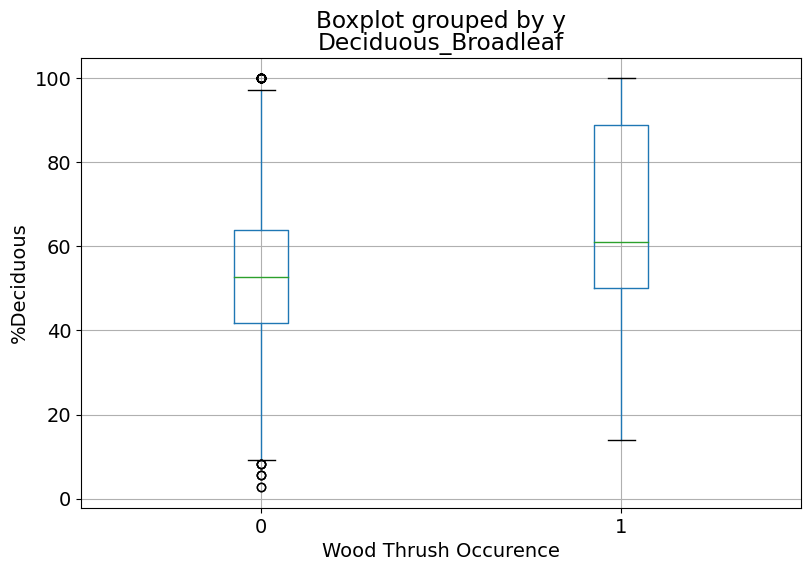

In [6]:
# -----------------------------------------
# Boxplot Wood Thrush Occurrence vs % Deciduous
# -----------------------------------------
fig, ax2 = plt.subplots(figsize = (9,6))
train_data.boxplot(column='Deciduous_Broadleaf',by='y',ax=ax2,fontsize=14)
ax2.set_xlabel('Wood Thrush Occurence')
ax2.set_ylabel('%Deciduous')
plt.show()

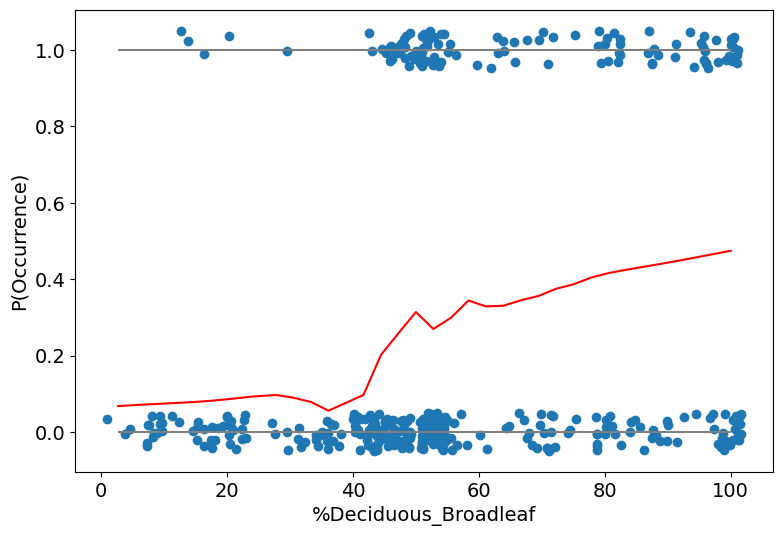

In [7]:
# -----------------------------------------
# Plot Jittered Scatterplot
# Wood Thrush Occurrence vs % Deciduous
# -----------------------------------------
#jitter the data points
jittered_x=train_data.Deciduous_Broadleaf+np.random.uniform(-2, 2, train_data.Deciduous_Broadleaf.shape)
jittered_y=train_data.y+np.random.uniform(-0.05, 0.05, train_data.y.shape)
#compute the lowess, iter=0 is important for binary data!
z=sm.nonparametric.lowess(train_data.y, train_data.Deciduous_Broadleaf,frac=0.5,it=0)
#plot
plt.figure(figsize=(9,6))
plt.scatter(jittered_x, jittered_y)
plt.ylabel('P(Occurrence)')
plt.xlabel('%Deciduous_Broadleaf')
plt.hlines([0,1],train_data.Deciduous_Broadleaf.min(),train_data.Deciduous_Broadleaf.max(),'grey')
plt.plot(z[:,0],z[:,1],'r')
plt.show()

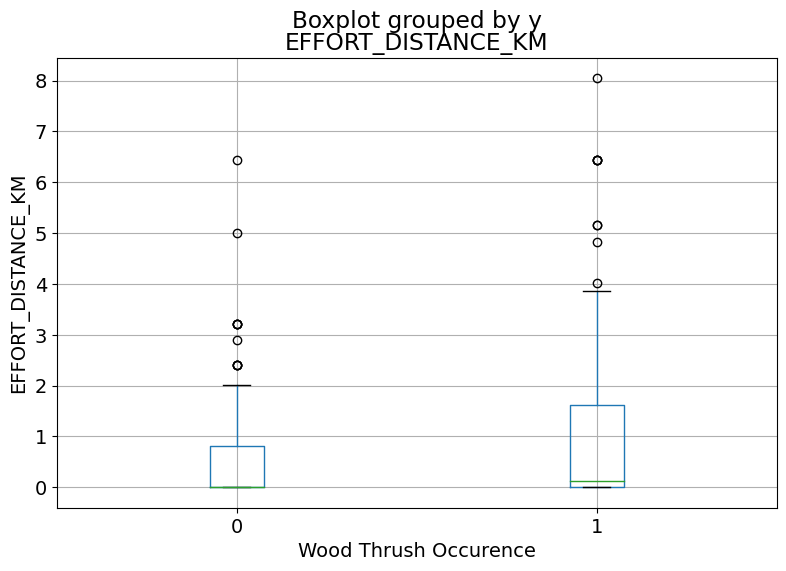

In [8]:
# -----------------------------------------
# Boxplots vs Search Effort (Distance Traveled)
# -----------------------------------------
fig, ax2 = plt.subplots(figsize = (9,6))
train_data.boxplot(column='EFFORT_DISTANCE_KM',by='y',ax=ax2)
ax2.set_xlabel('Wood Thrush Occurence')
ax2.set_ylabel('EFFORT_DISTANCE_KM')
plt.show()

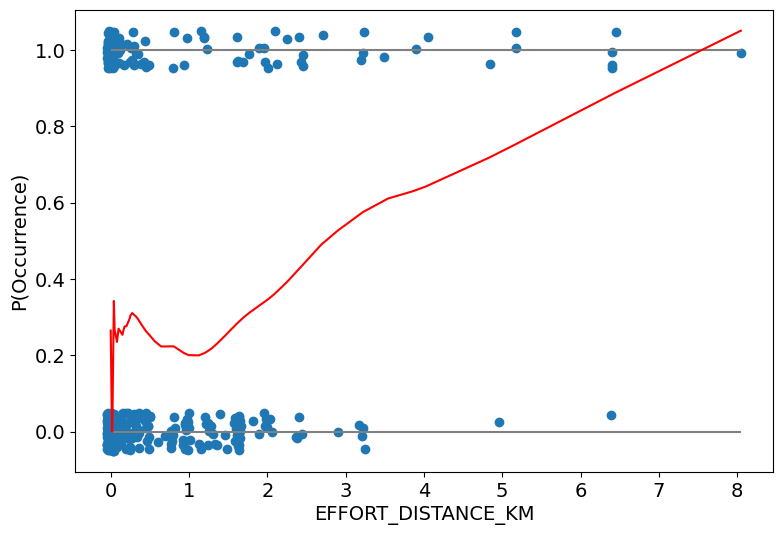

In [9]:
# -----------------------------------------
# Plot Jittered Scatterplot
# Wood Thrush Occurrence vs Search Effort (Distance Traveled)
# -----------------------------------------
#jitter the data points
jittered_x=train_data.EFFORT_DISTANCE_KM+np.random.uniform(-0.05, 0.05, train_data.EFFORT_DISTANCE_KM.shape)
jittered_y=train_data.y+np.random.uniform(-0.05, 0.05, train_data.y.shape)
#compute the lowess, iter=0 is important for binary data!
z=sm.nonparametric.lowess(train_data.y, train_data.EFFORT_DISTANCE_KM,frac=0.5,it=0)
#plot
plt.figure(figsize=(9,6))
plt.scatter(jittered_x, jittered_y)
plt.ylabel('P(Occurrence)')
plt.xlabel('EFFORT_DISTANCE_KM')
plt.hlines([0,1],train_data.EFFORT_DISTANCE_KM.min(),train_data.EFFORT_DISTANCE_KM.max(),'grey')
plt.plot(z[:,0],z[:,1],'r')
plt.show()

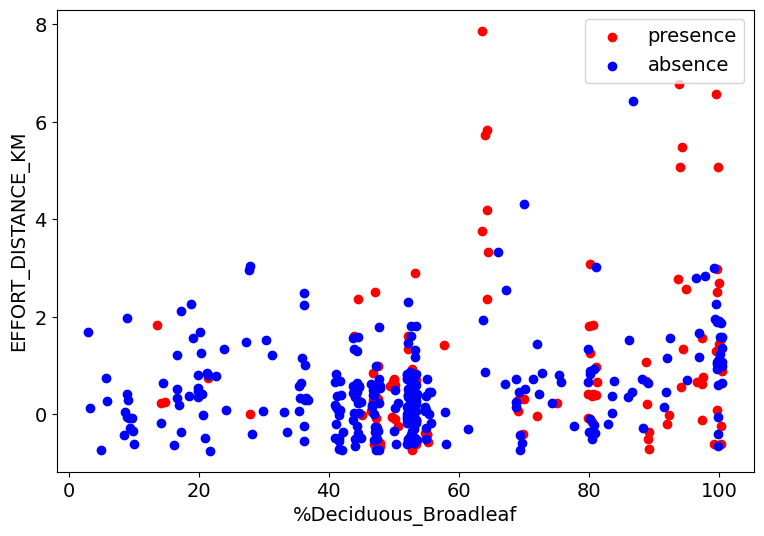

In [10]:
# -----------------------------------------
# Coded Scatterplot
# Wood Thrush Occurrence vs both
# % Deciduous and Search Effort (Distance travelled)
# -----------------------------------------
# Data points where bird is observed
dfx=train_data[train_data.y==1]['Deciduous_Broadleaf']
dfy=train_data[train_data.y==1]['EFFORT_DISTANCE_KM']
jittered_x=dfx+np.random.uniform(-0.75, 0.75, dfx.shape)
jittered_y=dfy+np.random.uniform(-0.75, 0.75, dfy.shape)
# Data points where bird is not observed
dfx2=train_data[train_data.y==0]['Deciduous_Broadleaf']
dfy2=train_data[train_data.y==0]['EFFORT_DISTANCE_KM']
jittered_x2=dfx2+np.random.uniform(-0.75, 0.75, dfx2.shape)
jittered_y2=dfy2+np.random.uniform(-0.75, 0.75, dfy2.shape)
plt.figure(figsize=(9,6))
plt.scatter(jittered_x, jittered_y,c='red',label='presence')
plt.scatter(jittered_x2, jittered_y2,c='blue',label='absence')
plt.xlabel('%Deciduous_Broadleaf')
plt.ylabel('EFFORT_DISTANCE_KM')
plt.legend()

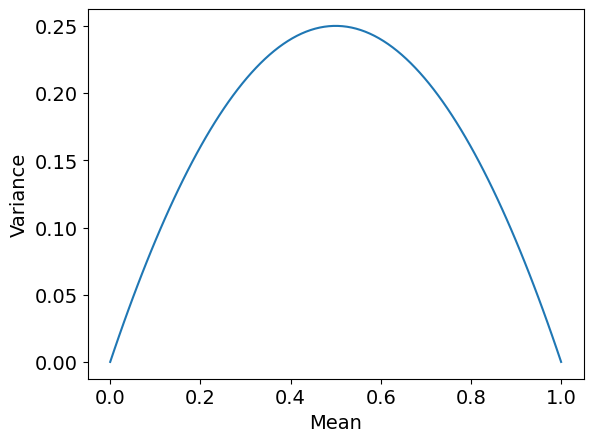

In [11]:
# -----------------------------------------
# Bernoulli Mean vs Variance
# -----------------------------------------
p=np.linspace(0.0, 1.0, num=100)
plt.plot(p,p*(1-p))
plt.xlabel('Mean')
plt.ylabel('Variance')
plt.show()

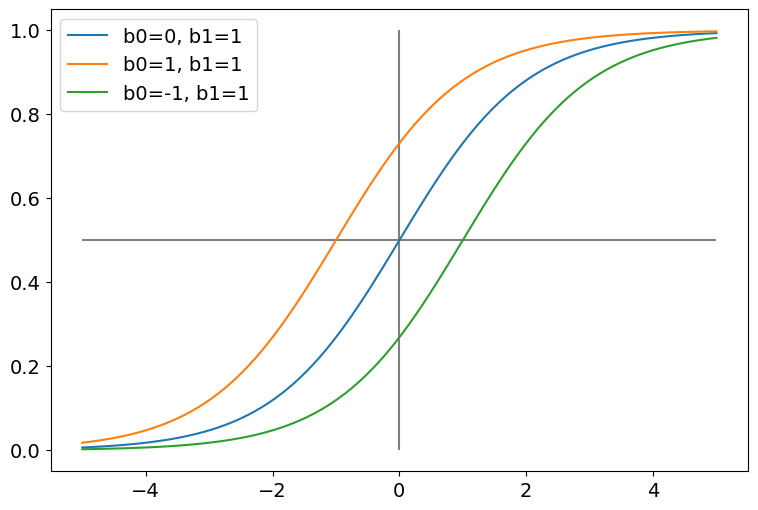

In [12]:
# -----------------------------------------
# Logistic Regression Function: Beta_0 Sequence
# -----------------------------------------
xxx = np.linspace(-5, 5, num=100)
beta0 = 0
beta1 = 1
linear_predictor=beta0+xxx*beta1
yyy= np.exp(linear_predictor)/(1+np.exp(linear_predictor))
plt.figure(figsize=(9,6))
plt.hlines(0.5,-5,5,'grey')
plt.vlines(0,0,1,'grey')
plt.plot(xxx,yyy,label='b0=0, b1=1')

beta0 = 1
beta1 = 1
linear_predictor=beta0+xxx*beta1
yyy= np.exp(linear_predictor)/(1+np.exp(linear_predictor))
plt.plot(xxx,yyy,label='b0=1, b1=1')

beta0 = -1
beta1 = 1
linear_predictor=beta0+xxx*beta1
yyy= np.exp(linear_predictor)/(1+np.exp(linear_predictor))
plt.plot(xxx,yyy,label='b0=-1, b1=1')
plt.legend()
plt.show()

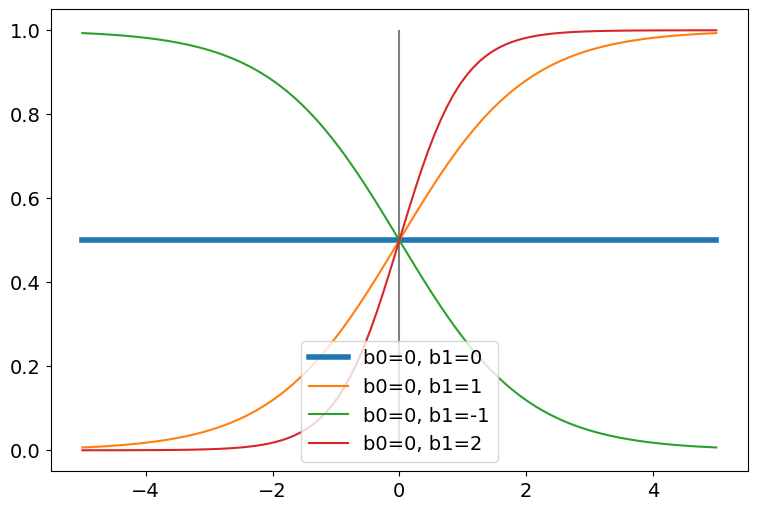

In [13]:
# -----------------------------------------
# Logistic Regression Function: Beta_1 Sequence
# -----------------------------------------
xxx = np.linspace(-5, 5, num=100)
beta0 = 0
beta1 = 0
linear_predictor=beta0+xxx*beta1
yyy= np.exp(linear_predictor)/(1+np.exp(linear_predictor))
plt.figure(figsize=(9,6))
plt.hlines(0.5,-5,5,'grey')
plt.vlines(0,0,1,'grey')
plt.plot(xxx,yyy,label='b0=0, b1=0', linewidth=4.0)

beta0 = 0
beta1 = 1
linear_predictor=beta0+xxx*beta1
yyy= np.exp(linear_predictor)/(1+np.exp(linear_predictor))
plt.plot(xxx,yyy,label='b0=0, b1=1')

beta0 = 0
beta1 = -1
linear_predictor=beta0+xxx*beta1
yyy= np.exp(linear_predictor)/(1+np.exp(linear_predictor))
plt.plot(xxx,yyy,label='b0=0, b1=-1')

beta0 = 0
beta1 = 2
linear_predictor=beta0+xxx*beta1
yyy= np.exp(linear_predictor)/(1+np.exp(linear_predictor))
plt.plot(xxx,yyy,label='b0=0, b1=2')
plt.legend()
plt.show()

In [14]:
# -------------------------------------------------------------
# Logisitic Regression with Multiple Predictors!
# --------------------------------------------------------------
# Compute and interpret /beta's for effort & deciduous
# Compare model with and without effort
# --------------------------------------------------------------
d2=smf.glm(formula = "y ~ Deciduous_Broadleaf+EFFORT_DISTANCE_KM",
               family=sm.families.Binomial(),
               data=train_data).fit()
print(d2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  407
Model:                            GLM   Df Residuals:                      404
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -225.27
Date:                Thu, 25 Apr 2024   Deviance:                       450.53
Time:                        00:03:01   Pearson chi2:                     401.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08450
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.3884    

In [15]:
# -----------------------------------------
# Prediction: with Decid_Broadleaf = 40 & EFFORT DIST = 1km
# -----------------------------------------
new_df = pd.DataFrame(
    {'Deciduous_Broadleaf':[40],
     'EFFORT_DISTANCE_KM':[1.0]})

pred = d2.get_prediction(new_df)

print('se:',pred.se_mean)
print('prediction:',pred.predicted_mean)
print('residual variance:',pred.var_resid)

se: [0.02816885]
prediction: [0.21722472]
residual variance: 1.0


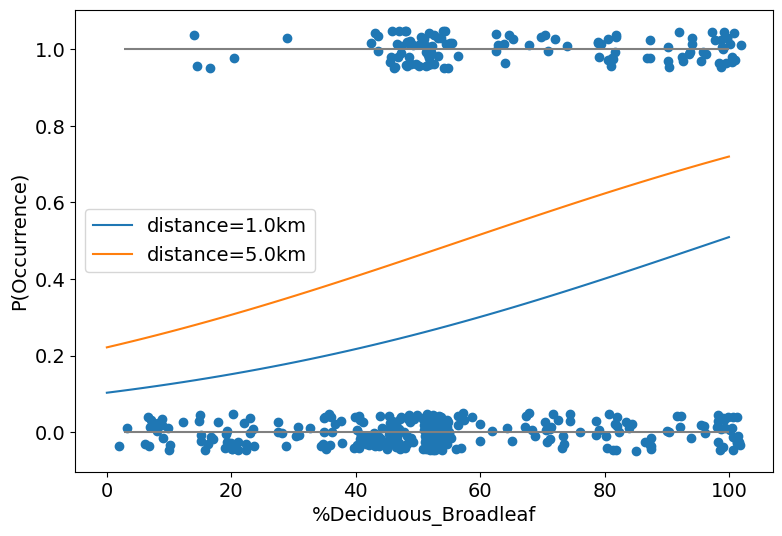

In [16]:
# -----------------------------------------
# Plot Wood Thrush Occurrence vs % Deciduous
# with EFFORT DIST = 1km and 5km
# -----------------------------------------
#jitter the data points
jittered_x=train_data.Deciduous_Broadleaf+np.random.uniform(-2, 2, train_data.Deciduous_Broadleaf.shape)
jittered_y=train_data.y+np.random.uniform(-0.05, 0.05, train_data.y.shape)
#plot
plt.figure(figsize=(9,6))
plt.scatter(jittered_x, jittered_y)
plt.ylabel('P(Occurrence)')
plt.xlabel('%Deciduous_Broadleaf')
plt.hlines([0,1],train_data.Deciduous_Broadleaf.min(),train_data.Deciduous_Broadleaf.max(),'grey')

# Create new dataframe with distance=1.0km
xxx = np.linspace(0,100.0,num=50)
new_df = pd.DataFrame(
    {'Deciduous_Broadleaf':xxx,
     'EFFORT_DISTANCE_KM':np.ones(50)})

# make predictions and plot the results
pred = d2.get_prediction(new_df)
yyy = pred.predicted_mean

plt.plot(xxx,yyy,
         label='distance=1.0km')


# Create new dataframe with distance=5.0km
new_df2 = pd.DataFrame(
    {'Deciduous_Broadleaf':xxx,
     'EFFORT_DISTANCE_KM':np.ones(50)*5.0})
# make predictions and plot the results
pred2 = d2.get_prediction(new_df2)
yyy2 = pred2.predicted_mean
plt.plot(xxx,yyy2,label='distance=5.0km')
plt.legend()
plt.show()

In [17]:
# -------------------------------------------------------------
# Assess Predictive Performance & Compare Models
# --------------------------------------------------------------
d=smf.glm(formula = "y ~ Deciduous_Broadleaf",
               family=sm.families.Binomial(),
               data=train_data).fit()
print(d.summary())
d2=smf.glm(formula = "y ~ Deciduous_Broadleaf+EFFORT_DISTANCE_KM",
               family=sm.families.Binomial(),
               data=train_data).fit()
print(d2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  407
Model:                            GLM   Df Residuals:                      405
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -228.20
Date:                Thu, 25 Apr 2024   Deviance:                       456.40
Time:                        00:03:02   Pearson chi2:                     400.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07121
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.4451    

In [18]:
# -------------------------------------------------------------
# Compute MSE to Assess Predictive Performance
# A simple, general purpose measure
# --------------------------------------------------------------
test_pred=d.get_prediction(test_data).predicted_mean
test_pred2=d2.get_prediction(test_data).predicted_mean

yyy=np.array(test_data.y)
print('MSE of d:', np.mean((yyy-test_pred)**2))
print('MSE of d2:', np.mean((yyy-test_pred2)**2))


MSE of d: 0.17629872389364748
MSE of d2: 0.17269876577895465


In [19]:
# -------------------------------------------------------------
# Compute log-loss to Assess Predictive Performance
# --------------------------------------------------------------
# remove 0 and 1 from the vectors to avoid errors in computation
test_pred=np.where(test_pred == 0 , 0.01, test_pred)
test_pred=np.where(test_pred == 1 , 0.99, test_pred)
test_pred2=np.where(test_pred2 == 0 , 0.01, test_pred2)
test_pred2=np.where(test_pred2 == 1 , 0.99, test_pred2)

print('Log-loss of d:',
      np.sum(yyy*np.log(test_pred) +
                               (1-yyy)*np.log(1-test_pred)))
print('Log-loss of d2:',
      np.sum(yyy*np.log(test_pred2) +
                                (1-yyy)*np.log(1-test_pred2)))

Log-loss of d: -219.51622370533576
Log-loss of d2: -216.2686701386857


In [20]:
# -------------------------------------------------------------
# Compute AUC Assess Predictive Performance
# --------------------------------------------------------------
print('AUC score of d:', roc_auc_score(test_data.y,test_pred))
print('AUC score of d2:', roc_auc_score(test_data.y,test_pred2))

AUC score of d: 0.6968279666606704
AUC score of d2: 0.7089254662109492
